In [30]:
# import autograd-wrapped numpy
import autograd.numpy as np
from sklearn.datasets import fetch_openml
import cv2
from tqdm import tqdm
from autograd import grad


# datapath to data
datapath = '../mlrefined_datasets/superlearn_datasets/'

# Exercise 7.2.  One-versus-All classification

In [31]:
import numpy as np
from sklearn.linear_model import LogisticRegression

csvname = '4class_data.csv'
data = np.loadtxt(datapath + csvname,delimiter = ',');

x = data[:-1,:]
y = data[-1:,:] 
models = []
for i in range(int(y.max()) + 1):
    label = np.equal(y, i)
    label = label.astype(int).squeeze()
    
    model = LogisticRegression(solver='lbfgs', max_iter=300)
    model.fit(x.T, label)
    models.append(model)
    
res = []
for model in models:
    res.append(np.array(model.predict_proba(x.T)[:, 1]))
    
final_pred = np.argmax(np.array(res).transpose(1, 0), axis = 1)
print("The number of mis-classification samples: ", np.sum(final_pred != y[0]))

The number of mis-classification samples:  9


# Exercise 7.3.  Multi-class Perceptron

In [32]:
import autograd.numpy as np
from autograd import grad

# load in dataset
csvname = '3class_data.csv'
data = np.loadtxt(datapath + csvname,delimiter = ',')

# get input/output pairs
x = data[:-1,:]
y = data[-1:,:]


def pred(x, w):
    a = w[0] + x.T @ w[1:]
    return a.T
 
def loss(w, x, y):
    res = pred(x, w)
    res = np.sum(res.max(axis=0) - res[y.flatten().astype(int), np.arange(np.size(y))])
    res = res + 1e-5 * np.linalg.norm(w[1:, :]) ** 2
    return res / float(np.size(y))
 
w = 0.1 * np.random.randn(x.shape[0] + 1, np.unique(y).size)
gra = grad(loss)
 
lr = 0.005
epochs = 3000
for _ in range(epochs):
    w -= lr * gra(w, x, y)

print("The number of misclassification sample: ", (np.argmax(pred(x, w), axis = 0) != y[0].astype(int)).sum())

The number of misclassification sample:  0


# Exercise 7.4. The multi-class and two-class Perceptrons


\begin{equation}
\begin{align}
g(w_0, w_1) = \sum_{p = 1}^P [\text{max}({x}_{p}^Tw_0, {x}_{p}^Tw_1) - x_p^Tw_{yp}] \\ 
= \sum_{p = 1}^P [\text{max}({x}_{p}^Tw_0 - x_p^Tw_{yp}, {x}_{p}^Tw_1 - x_p^Tw_{yp})]
\end{align}
\end{equation}
When $y=-1$


\begin{equation}
\begin{align}
g(w_0, w_1) = \sum_{p = 1}^P [\text{max}({x}_{p}^Tw_0 - x_p^Tw_{0}, {x}_{p}^Tw_1 - x_p^Tw_{0})] = \sum_{p = 1}^P [\text{max}(0, {x}_{p}^T(w_1 - w_0))] \\
= \sum_{p = 1}^P [\text{max}(0, 1{x}_{p}^T(w_1 - w_0))] = \sum_{p = 1}^P [\text{max}(0, (-y){x}_{p}^T(w_1 - w_0))]
\end{align}
\end{equation}

When $y=1$




\begin{equation}
\begin{align}
g(w_0, w_1) = \sum_{p = 1}^P [\text{max}({x}_{p}^Tw_0 - x_p^Tw_{1}, {x}_{p}^Tw_1 - x_p^Tw_{1})] = \sum_{p = 1}^P [\text{max}({x}_{p}^T(w_0 - w_1), 0)] \\ 
= \sum_{p = 1}^P [\text{max}({x}_{p}^T(-1)(w_1 - w_0), 0)] = \sum_{p = 1}^P [\text{max}({x}_{p}^T(-y)(w_1 - w_0), 0)]
\end{align}
\end{equation}


Let $w = w_1-w_0$
\begin{equation}
\begin{align}
g(w) = \sum_{p = 1}^P [\text{max}(0, -y_p{x}_{p}^Tw)]
\end{align}
\end{equation}




# Exercise 7.8. The multi-class Perceptron and Softmax costs are convex
Perceptron
\begin{equation}
g(w_0,w_1,...,w_{C-1}) = \frac{1}{P}\sum_{p=1}^P[\text{max}_i(x_p^Tw_i) - x_p^Tw_y]
\end{equation}

\begin{equation}
\begin{align}
g(\lambda w_0 + (1-\lambda)w_0', \lambda w_1 + (1-\lambda)w_1',...,\lambda w_{C-1} + (1-\lambda)w_{C-1}') \\= \frac{1}{P}\sum_{p=1}^P[\text{max}_i(\lambda x_p^Tw_i + (1-\lambda)x_p^Tw_i') - \lambda x_p^Tw_y - (1-\lambda)x_p^Tw_y'] \\
\leq \frac{1}{P}\sum_{p=1}^P[\lambda max(x_p^Tw_i) + (1-\lambda) max(x_p^Tw_i')  - \lambda x_p^Tw_y - (1-\lambda)x_p^Tw_y']\\ = \frac{1}{P}\sum_{p=1}^P[\lambda max(x_p^Tw_i) - \lambda x_p^Tw_y] +  \frac{1}{P}\sum_{p=1}^P[(1-\lambda) max(x_p^Tw_i') - (1-\lambda)x_p^Tw_y']\\
= \lambda g(w_0,w_1,...,w_{C-1}) + (1-\lambda)g(w_0',w_1',...,w_{C-1}')
\end{align}
\end{equation}

Softmax <br>
\begin{equation}
\begin{align}
g(w_0,w_1,...,w_{C-1}) = \frac{1}{P}\sum_{p=1}^P[\log(\sum e^{x^Tw}) - x^Tw_y]
\end{align}
\end{equation}


Since the summation of convex is still convex, and $x^Tw_y$ is convex, to prove g is convex, only need to prove $\log(\sum e^{x^Tw})$ convex


\begin{equation}
\begin{align}
\log(\sum e^{x^T(\lambda w + (1-\lambda)w')}) = \log(\sum e^{x^T\lambda w + x^T(1-\lambda)w'}) = \log(\sum e^{x^T\lambda w}e^{x^T(1-\lambda)w'})
\end{align}
\end{equation}

From Hölder's inequality

\begin{equation}
\begin{align}
\sum e^{x^T\lambda w}e^{x^T(1-\lambda)w'} \leq (\sum (e^{x^T\lambda w})^{\frac{1}{\lambda}})^\lambda (\sum (e^{x^T(1-\lambda) w'})^{\frac{1}{(1-\lambda)}})^{(1-\lambda)} \\ 
= (\sum e^{x^Tw})^\lambda(\sum e^{x^Tw'})^{(1-\lambda)}
\end{align}
\end{equation}


\begin{equation}
\begin{align}
\log(\sum e^{x^T\lambda w}e^{x^T(1-\lambda)w'}) \leq \log((\sum e^{x^Tw})^\lambda(\sum e^{x^Tw'})^{(1-\lambda)}) \\
 = \lambda\log(\sum e^{x^Tw}) + (1-\lambda)\log(\sum e^{x^Tw'})
\end{align}
\end{equation}
Therefore $\log(\sum e^{x^Tw})$ convex, g convex

# Exercise 9.2. MNIST classification: pixels vs edge-based features

In [33]:
def get_hist(x):
    blur = (cv2.GaussianBlur(x.reshape(28, 28, 1), (3,3), 0))
    sobelx = cv2.Sobel(src=blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3) # Sobel Edge Detection on the X axis
    sobely = cv2.Sobel(src=blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3) # Sobel Edge Detection on the Y axis
    sobelxy = np.sqrt(sobelx**2 + sobely**2)
    sobelxy = (sobelxy * 255 / sobelxy.max()).astype(np.uint8)
    res = [cv2.calcHist([sobelxy], [0], None, [256], [0, 256]).squeeze()]
    for i in range(4):
        for j in range(4):
            blur = (cv2.GaussianBlur(x.reshape(28, 28, 1)[4*i:4*(i+1), 4*j:4*(j+1)], (3,3), 0))
            sobelx = cv2.Sobel(src=blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3) # Sobel Edge Detection on the X axis
            sobely = cv2.Sobel(src=blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3) # Sobel Edge Detection on the Y axis
            sobelxy = np.sqrt(sobelx**2 + sobely**2)
            sobelxy = (sobelxy * 255 / sobelxy.max()).astype(np.uint8)
            res.append(cv2.calcHist([sobelxy], [0], None, [16], [0, 256]).squeeze())
    return np.concatenate(res, axis=0)


# import MNIST
import matplotlib.pyplot as plt
x, y = fetch_openml('mnist_784', version=1, return_X_y=True)


# re-shape input/output data
y = np.array([int(v) for v in y])[:, np.newaxis]
x = x.to_numpy()[:50000, :]
y = y[:50000, :]
print(x.shape)
print(y.shape)


x_hist = np.zeros((x.shape[0], 512))
for i in range(x.shape[0]):
    x_hist[i, :] = get_hist(x[i])

(50000, 784)
(50000, 1)


C:\Users\86186\AppData\Local\Temp\ipykernel_14376\2070455821.py:14: RuntimeWarning: invalid value encountered in true_divide
  sobelxy = (sobelxy * 255 / sobelxy.max()).astype(np.uint8)


In [34]:
# cv2.imwrite("../test1.png", x[0].reshape(28, 28, 1))
# canny = cv2.Canny((x[0].reshape(28, 28, 1)).astype(np.uint8), 50, 150)
# cv2.imwrite("../test2.png", cv2.calcHist([canny], [0], None, [num_bin], [0, 256]))


x_mean = x.mean(axis=0, keepdims=True)
x_std = np.std(x, axis=0, keepdims=True)
x = (x - x_mean) / (x_std + 1e-5)
x = np.hstack((np.ones((x.shape[0], 1)), x))

x_hist = x_hist[:, 1:]
x_mean = x_hist.mean(axis=0, keepdims=True)
x_std = np.std(x_hist, axis=0, keepdims=True)
x_hist = (x_hist - x_mean) / (x_std + 1e-5)
x_hist = np.hstack((np.ones((x_hist.shape[0], 1)), x_hist))






In [35]:
def pred(ws, x):
    return x @ ws.T

def loss(ws, x, y):
    res = pred(ws, x)
    tmp = res[np.arange(res.shape[0]), y.squeeze()][:, np.newaxis]
    res = np.exp(res - tmp).sum(axis=1, keepdims=True)


    return np.log(1 + res).mean() #+ 1e-4 * np.linalg.norm(ws[:, 1:]) ** 2


def calc_cost(ws, x, y):
    num = 0
    res = 0
    count = 0
    while num < x.shape[0]:
        res += loss(ws, x[num : num + 200, :], y[num : num + 200, :])
        count += 1
        num += 200
    return res / count


def calc_mis(ws, x, y):
    num = 0
    res = 0
    while num < x.shape[0]:
        pred_out = np.argmax(pred(ws, x[num : num + 200, :]), axis=1)[:, np.newaxis]
        res += (pred_out != y[num : num + 200, :]).sum()
        num += 200
    return res

loss_grad = grad(loss, 0)

def train_and_display(ws, x, y):
    lr = 1e-2
    batch_size = 200
    epochs = 20


    cost_hist = [calc_cost(ws, x, y)]
    mis_hist = [calc_mis(ws, x, y)]

    for _ in range(epochs):
        num = 0
        # print(y[num : num + 10, :].squeeze())
        # print(np.argmax(pred(ws, x[num : num + 10, :]), axis=1))
        for _ in tqdm(range(x.shape[0] // batch_size)):
            x_batch = x[num : num + batch_size, :]
            y_batch = y[num : num + batch_size, :]
            ws -= lr * loss_grad(ws, x_batch, y_batch)
            num += batch_size
        cost_hist.append(calc_cost(ws, x, y))
        mis_hist.append(calc_mis(ws, x, y))

    return cost_hist, mis_hist

In [36]:
ws = np.random.rand(y.max()+1, x.shape[1])
ori_cost, ori_mis = train_and_display(ws, x, y)
ws = np.random.rand(y.max()+1, x_hist.shape[1])
hist_cost, hist_mis = train_and_display(ws, x_hist, y)


  0%|          | 0/250 [00:00<?, ?it/s]

100%|██████████| 250/250 [00:00<00:00, 1000.90it/s]


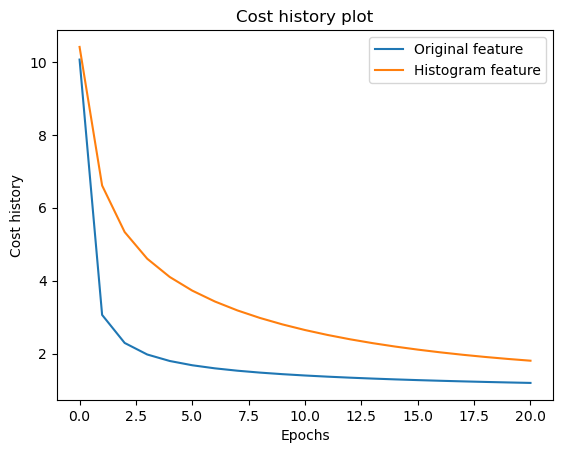

In [37]:
plt.plot(np.arange(len(ori_cost)), ori_cost, label="Original feature")
plt.plot(np.arange(len(hist_cost)), hist_cost, label="Histogram feature")
plt.xlabel("Epochs")
plt.ylabel("Cost history")
plt.title("Cost history plot")
plt.legend()


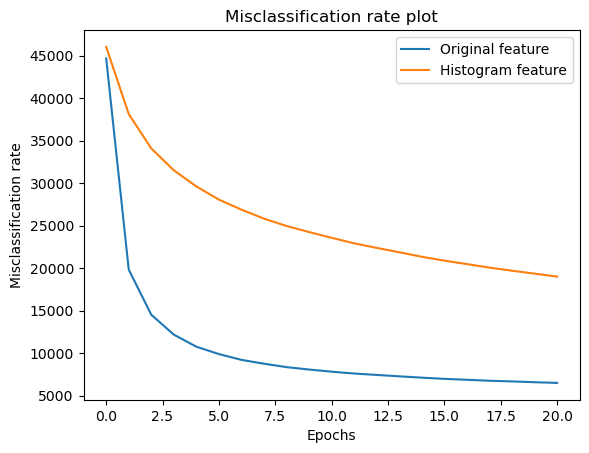

In [38]:
plt.plot(np.arange(len(ori_mis)), ori_mis, label="Original feature")
plt.plot(np.arange(len(hist_mis)), hist_mis, label="Histogram feature")
plt.xlabel("Epochs")
plt.ylabel("Misclassification rate")
plt.title("Misclassification rate plot")
plt.legend()

